In [106]:
emp_spec_schiz = np.load("emp_spec_schiz.npy")
emp_spec_control = np.load("emp_spec_control.npy")

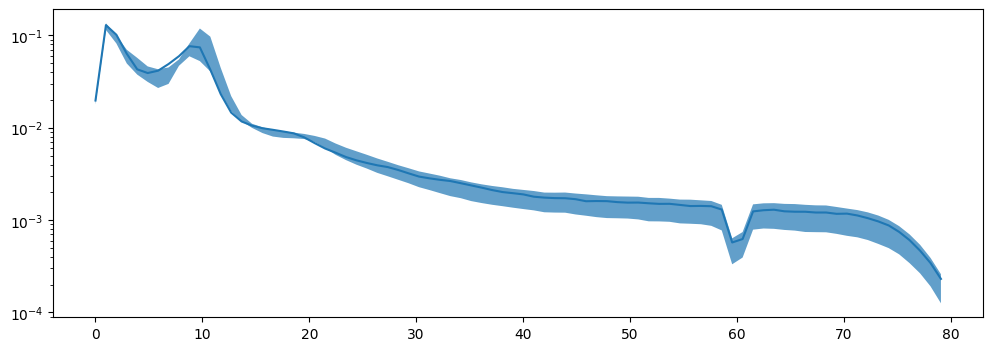

In [113]:
# Note, will need to extract freqs from the Generate_Empricial_PSD.py script. See comment there


import matplotlib.pyplot as plt

# Calculate mean and standard deviation
mean_spectrum = emp_spec_schiz.mean(axis=0)
std_spectrum = emp_spec_schiz.std(axis=0)

plt.figure(figsize=(12, 4))

plt.semilogy(freqs, mean_spectrum, label='Mean Spectrum')
plt.fill_between(freqs, mean_spectrum_control - std_spectrum_control, mean_spectrum_control + std_spectrum_control, alpha=0.7, label='Standard Deviation')
plt.show()

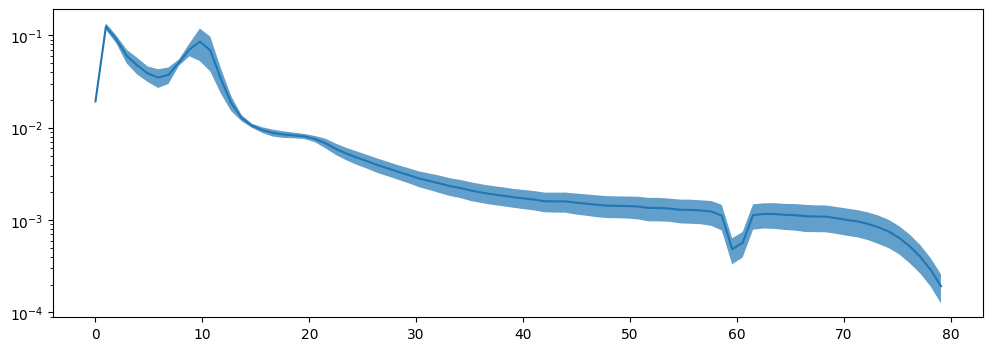

In [114]:

plt.figure(figsize=(12, 4))
# Calculate mean and standard deviation
mean_spectrum_control = emp_spec_control.mean(axis=0)
std_spectrum_control = emp_spec_control.std(axis=0)

plt.semilogy(freqs, mean_spectrum_control, label='Mean Spectrum')
plt.fill_between(freqs, mean_spectrum_control - std_spectrum_control, mean_spectrum_control + std_spectrum_control, alpha=0.7, label='Standard Deviation')
plt.show()

In [ ]:
_, _, _, V_T_sim.t = run_jansen_and_rit([# insert 10 params here])
gen_data = V_T_sim.T
fake_info = mne.create_info(62, sfreq=1000, ch_types="eeg")
gen_raw = mne.io.RawArray(gen_data, fake_info)
gen_spec = gen_raw.compute_psd(fmin=0, fmax=80, picks="all")
gen_spec.plot(average=True)

In [28]:
# plotting all psds from empirical data
import os
import numpy as np
import mne
from scipy.stats import zscore
import pandas as pd

eeg_raw_data_dir = (
    "C:/Users/stapl/Documents/CDocuments/FinalYearProject/Model/eeg_raw_data"
)

all_channels_psds = {}  # Will be of length 62 as this is max channels

smallest_ch_samples = 74255  # precalculated
observed_freq_cap = 80
n_fft = 1024

metadata = pd.read_csv("eeg_metadata.csv")

# Filter subject IDs based on the 'Study' column
schizophrenia_subjects = metadata[metadata["Study"] == "Proband with Schizophrenia"][
    "SubjectID"
].tolist()
healthy_controls = metadata[metadata["Study"] == "Healthy Control"][
    "SubjectID"
].tolist()

skipped = []


def gen_emp_psd(eeg_freq):
    for filename in os.listdir(eeg_raw_data_dir):

        subject_id = int(filename.split("_", 5)[4])

        # Add filter here, depending on which subject group you want to generate the PSD for
        # Make sure to change the name saved too
        if (subject_id) in schizophrenia_subjects:
            continue  # Skip to next iteration

        eeg_path = os.path.join(eeg_raw_data_dir, filename)
        raw = mne.io.read_raw_fif(eeg_path, preload=True)
        gen_spec = raw.compute_psd(fmin=0, fmax=80, picks="all", n_fft=n_fft)
        gen_spec.plot(average=True)
        print(gen_spec.shape)
        
        break

In [4]:
# To extract pickle res files so can get parameters 

import pickle
from skopt.plots import plot_convergence, plot_objective
%run Jansen_And_Rit.py
%run OptimiseFunctions.py

with open('results/bold_shchiz_180_gp_32in.pkl', 'rb') as f:
    schiz_bold = pickle.load(f)

with open('results/bold_control_180_gp_32in.pkl', 'rb') as f:
    control_bold = pickle.load(f)

with open('results/eeg_schiz_150_gp_32in.pkl', 'rb') as f:
    schiz_eeg = pickle.load(f)

with open('results/eeg_control_180_gp_32in.pkl', 'rb') as f:
    control_eeq = pickle.load(f)